Adapted from [Fall 2019 Data 100 HW 4: Trump, Twitter, and Text](http://www.ds100.org/fa19/syllabus/)

In [1]:
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Background

Potential sources: 
- http://varianceexplained.org/r/trump-tweets/
- 

 2 larger branches of thought
 - fake news
 - emotions / implicit & explicit racism

## ADD CODEBOOK
- explain polarity

In [2]:
trump = Table().read_table('trump_tweets.csv')
trump

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2016-01-21 13:56:11,Twitter for Android,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/ ...",1059,2016.05,2016-01-21 08:56:11-05:00,8.93639,bigop1 realdonaldtrump sarahpalinusa https t co ...,0
2016-01-21 13:57:39,Twitter for Android,"""@americanaspie: @glennbeck @sarahpalinusa remember whe ...",1339,2016.05,2016-01-21 08:57:39-05:00,8.96083,americanaspie glennbeck sarahpalinusa remember whe ...,-2.6
2016-01-21 14:04:54,Twitter for Android,so sad that @cnn and many others refused to show the mas ...,2006,2016.05,2016-01-21 09:04:54-05:00,9.08167,so sad that cnn and many others refused to show the mas ...,-6
2016-01-21 14:19:26,Twitter for Android,"sad sack @jebbush has just done another ad on me, with s ...",2266,2016.05,2016-01-21 09:19:26-05:00,9.32389,sad sack jebbush has just done another ad on me with s ...,4.3
2016-01-21 14:32:57,Twitter for Android,low energy candidate @jebbush has wasted $80 million on ...,2886,2016.05,2016-01-21 09:32:57-05:00,9.54917,low energy candidate jebbush has wasted 80 million on ...,-2.6
2016-01-21 20:36:09,Twitter for iPhone,new day on cnn treats me very badly. @alisyncamerota is ...,1429,2016.05,2016-01-21 15:36:09-05:00,15.6025,new day on cnn treats me very badly alisyncamerota is ...,-5.2
2016-01-21 20:40:07,Twitter for Android,"happy birthday to my friend, the great @jacknicklaus - a ...",1053,2016.05,2016-01-21 15:40:07-05:00,15.6686,happy birthday to my friend the great jacknicklaus a ...,9.7
2016-01-21 23:21:42,Twitter for iPhone,"thank you, iowa! #trump2016 https://t.co/ryhehetlqn",2329,2016.05,2016-01-21 18:21:42-05:00,18.3617,thank you iowa trump2016 https t co ryhehetlqn,1.5
2016-01-21 23:29:04,Twitter for iPhone,thank you! #trump2016 https://t.co/pcdmyio1zt,1463,2016.05,2016-01-21 18:29:04-05:00,18.4844,thank you trump2016 https t co pcdmyio1zt,1.5
2016-01-21 23:29:43,Twitter for iPhone,"thank you, new hampshire! #trump2016 https://t.co/tg9ozkly4l",1761,2016.05,2016-01-21 18:29:43-05:00,18.4953,thank you new hampshire trump2016 https t co tg9ozkly4l,1.5


In [15]:
trump.group("year").sort("year", descending=True)

year,count
2019.13,2
2019.13,2
2019.12,5
2019.12,8
2019.12,9
2019.12,8
2019.11,9
2019.11,14
2019.11,16
2019.1,10


In [20]:
trump.sort("year")


time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2016-01-21 13:56:11,Twitter for Android,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/ ...",1059,2016.05,2016-01-21 08:56:11-05:00,8.93639,bigop1 realdonaldtrump sarahpalinusa https t co ...,0
2016-01-21 13:57:39,Twitter for Android,"""@americanaspie: @glennbeck @sarahpalinusa remember whe ...",1339,2016.05,2016-01-21 08:57:39-05:00,8.96083,americanaspie glennbeck sarahpalinusa remember whe ...,-2.6
2016-01-21 14:04:54,Twitter for Android,so sad that @cnn and many others refused to show the mas ...,2006,2016.05,2016-01-21 09:04:54-05:00,9.08167,so sad that cnn and many others refused to show the mas ...,-6
2016-01-21 14:19:26,Twitter for Android,"sad sack @jebbush has just done another ad on me, with s ...",2266,2016.05,2016-01-21 09:19:26-05:00,9.32389,sad sack jebbush has just done another ad on me with s ...,4.3
2016-01-21 14:32:57,Twitter for Android,low energy candidate @jebbush has wasted $80 million on ...,2886,2016.05,2016-01-21 09:32:57-05:00,9.54917,low energy candidate jebbush has wasted 80 million on ...,-2.6
2016-01-21 20:36:09,Twitter for iPhone,new day on cnn treats me very badly. @alisyncamerota is ...,1429,2016.05,2016-01-21 15:36:09-05:00,15.6025,new day on cnn treats me very badly alisyncamerota is ...,-5.2
2016-01-21 20:40:07,Twitter for Android,"happy birthday to my friend, the great @jacknicklaus - a ...",1053,2016.05,2016-01-21 15:40:07-05:00,15.6686,happy birthday to my friend the great jacknicklaus a ...,9.7
2016-01-21 23:21:42,Twitter for iPhone,"thank you, iowa! #trump2016 https://t.co/ryhehetlqn",2329,2016.05,2016-01-21 18:21:42-05:00,18.3617,thank you iowa trump2016 https t co ryhehetlqn,1.5
2016-01-21 23:29:04,Twitter for iPhone,thank you! #trump2016 https://t.co/pcdmyio1zt,1463,2016.05,2016-01-21 18:29:04-05:00,18.4844,thank you trump2016 https t co pcdmyio1zt,1.5
2016-01-21 23:29:43,Twitter for iPhone,"thank you, new hampshire! #trump2016 https://t.co/tg9ozkly4l",1761,2016.05,2016-01-21 18:29:43-05:00,18.4953,thank you new hampshire trump2016 https t co tg9ozkly4l,1.5


In [12]:
trump.where("no_punc", are.containing("black")).show()#scatter("year", "polarity")

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2016-01-22 21:39:15,Twitter for iPhone,"""national black republican association endorses donald j ...",2522,2016.06,2016-01-22 16:39:15-05:00,16.6542,national black republican association endorses donald j ...,1.4
2016-02-20 15:17:17,Twitter for Android,"""@blackan: #scprimary @realdonaldtrump is the only one w ...",1425,2016.14,2016-02-20 10:17:17-05:00,10.2881,blackan scprimary realdonaldtrump is the only one w ...,2.6
2016-02-20 15:20:27,Twitter for Android,"""@micah_micahk: @realdonaldtrump @blackan @danscavino th ...",3976,2016.14,2016-02-20 10:20:27-05:00,10.3408,micah_micahk realdonaldtrump blackan danscavino th ...,1.5
2016-08-22 01:19:06,Twitter for Android,"""@jimbos2002: @morning_joe video: hillary referring to ...",8093,2016.64,2016-08-21 20:19:06-05:00,20.3183,jimbos2002 morning_joe video hillary referring to ...,2.9
2016-08-27 15:18:52,Twitter for Android,"""@goldjazz559: #blackmenforbernie leader: #hillary2016 ‘ ...",4471,2016.65,2016-08-27 10:18:52-05:00,10.3144,goldjazz559 blackmenforbernie leader hillary2016 ...,-1.2
2016-09-05 01:28:02,Twitter for Android,"""@lblackvelvet: @realdonaldtrump we need to show america ...",5624,2016.68,2016-09-04 20:28:02-05:00,20.4672,lblackvelvet realdonaldtrump we need to show america ...,-3.7
2016-09-14 02:44:55,Twitter for iPhone,thank you rep. @marshablackburn! https://t.co/vxek0x4nts ...,3953,2016.7,2016-09-13 21:44:55-05:00,21.7486,thank you rep marshablackburn https t co vxek0x4nts ...,1.5
2016-10-09 14:05:17,Twitter for Android,"""@henryleledog: @realdonaldtrump this black democrat is ...",8054,2016.77,2016-10-09 09:05:17-05:00,9.08806,henryleledog realdonaldtrump this black democrat is ...,0
2017-10-27 14:52:42,Twitter for iPhone,"diane black of tennessee, the highly respected house bud ...",11185,2017.82,2017-10-27 09:52:42-05:00,9.87833,diane black of tennessee the highly respected house bud ...,4
2018-01-16 14:30:00,Twitter for iPhone,unemployment for black americans is the lowest ever reco ...,26149,2018.04,2018-01-16 09:30:00-05:00,9.5,unemployment for black americans is the lowest ever reco ...,2


# Part 3: Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:


In [5]:
print(''.join(open("vader_lexicon.txt").readlines()[300:340]))

lmao	2.0	1.18322	[3, 0, 3, 0, 3, 1, 3, 2, 3, 2]
lmbao	1.8	1.77764	[3, 2, 2, 2, 1, 3, -3, 2, 4, 2]
lmfao	2.5	1.28452	[3, 2, 3, 3, 3, -1, 4, 2, 3, 2]
lmso	2.7	0.78102	[3, 3, 4, 3, 3, 1, 3, 3, 2, 2]
lol	2.9	0.83066	[4, 2, 2, 2, 4, 2, 3, 3, 4, 3]
lolz	2.7	0.78102	[2, 3, 3, 2, 2, 4, 4, 3, 2, 2]
lts	1.6	0.66332	[1, 1, 2, 2, 1, 3, 1, 1, 2, 2]
ly	2.6	0.91652	[2, 2, 1, 3, 4, 4, 3, 2, 2, 3]
ly4e	2.7	0.78102	[3, 3, 3, 2, 1, 3, 3, 4, 2, 3]
lya	3.3	0.78102	[3, 4, 4, 4, 2, 2, 3, 4, 3, 4]
lyb	3.0	0.63246	[3, 3, 4, 3, 2, 3, 2, 4, 3, 3]
lyl	3.1	0.7	[4, 3, 4, 3, 2, 3, 3, 2, 4, 3]
lylab	2.7	0.78102	[3, 3, 3, 1, 3, 4, 2, 2, 3, 3]
lylas	2.6	0.8	[3, 3, 3, 1, 3, 4, 2, 2, 2, 3]
lylb	1.6	1.56205	[2, 2, 3, -2, 4, 1, 3, 1, 1, 1]
m8	1.4	1.0198	[3, 0, 1, 0, 1, 3, 2, 2, 1, 1]
mia	-1.2	0.4	[-2, -1, -1, -2, -1, -1, -1, -1, -1, -1]
mml	2.0	1.0	[1, 1, 2, 3, 3, 2, 1, 2, 4, 1]
mofo	-2.4	2.2	[-4, -4, -4, 0, -3, -2, -2, -4, 3, -4]
muah	2.8	1.07703	[1, 2, 4, 4, 4, 2, 4, 2, 2, 3]
mubar	-1.0	2.36643	[-4, -2, -3, -2, -2, -2, 1

# Polarity over Time
Does the polarity of post change based on the time of the day?

Did the polarity change between the years?

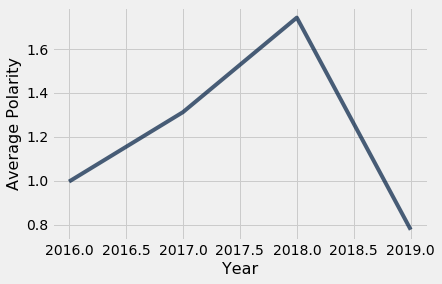

In [43]:
polarity_2016 = np.average(trump.where('year', are.below(2017)).column("polarity"))
polarity_2017 = np.average(trump.where('year', are.between(2017, 2018)).column("polarity"))
polarity_2018 = np.average(trump.where('year', are.between(2018, 2019)).column("polarity"))
polarity_2019 = np.average(trump.where('year', are.above(2019)).column("polarity"))

years = np.arange(2016, 2020)
polarities = make_array(polarity_2016, polarity_2017, polarity_2018, polarity_2019)

polarity_over_time = Table().with_columns("Year", years, "Average Polarity", polarities)
polarity_over_time.plot("Year")

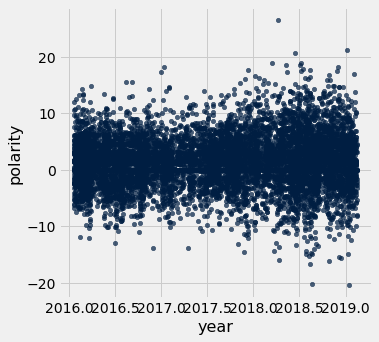

In [11]:
trump.scatter('year', "polarity")

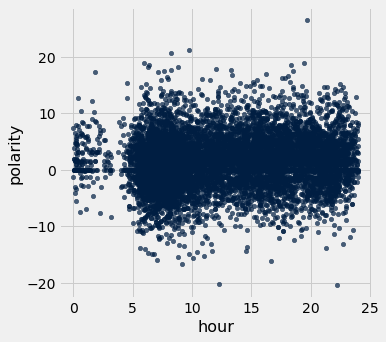

In [12]:
trump.scatter('hour', "polarity")

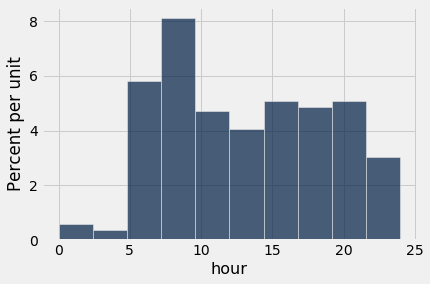

In [45]:
trump.hist("hour")

# Source
How does the source influence the polarity? Which source does he use most often?

In [24]:
source_group = trump.group("source").sort('count', descending=True)
source_group

source,count
Twitter for iPhone,7758
Twitter for Android,1982
Twitter Web Client,365
Media Studio,134
Twitter for iPad,60
Twitter Ads,34
Twitter Media Studio,33
Instagram,2
Periscope,1
Mobile Web (M5),1


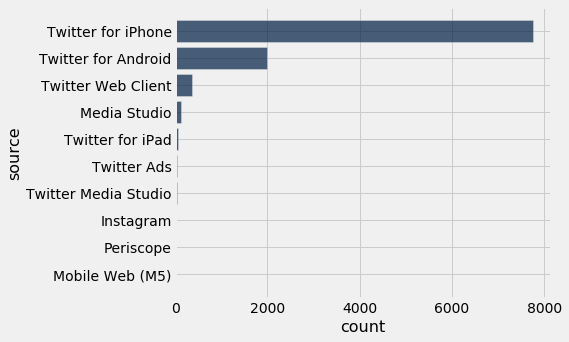

In [25]:
source_group.barh("source")

In [26]:
source_average = trump.group("source", np.average)
source_average

source,time average,text average,retweet_count average,year average,est_time average,hour average,no_punc average,polarity average
Instagram,,,5087.5,2016.38,,12.3636,,0.8
Media Studio,,,15999.2,2017.74,,15.8577,,3.49179
Mobile Web (M5),,,2274,2016.14,,11.3225,,-4.5
Periscope,,,9993,2016.85,,18.48,,1.2
Twitter Ads,,,13413.8,2017.34,,16.0677,,3.56176
Twitter Media Studio,,,19446.8,2018.64,,13.7721,,2.58182
Twitter Web Client,,,9824.73,2016.68,,15.5211,,0.786575
Twitter for Android,,,10348.8,2016.52,,12.3804,,0.749798
Twitter for iPad,,,13719.4,2017.56,,15.21,,2.37167
Twitter for iPhone,,,16659,2017.84,,13.1657,,1.42234


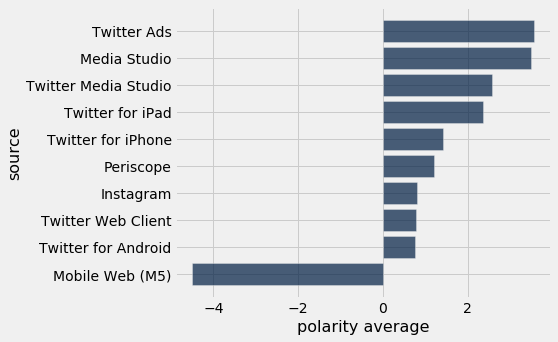

In [30]:
source_average.sort('polarity average', descending=True).barh("source", 'polarity average')

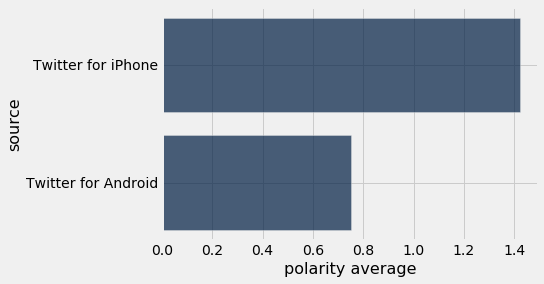

In [33]:
# Zoom in how do the most common sources vary by polarity
most_common = source_average.where('source', are.contained_in(make_array("Twitter for iPhone", "Twitter for Android")))
most_common.sort('polarity average', descending=True).barh("source", 'polarity average')

# Word breakdown

Choose 6 words (3 you expect to have a positive polarity and 3 you expect to have negative polarity). Calculate their average polarity. Add these into a table, and create a bar plot. 

In [79]:
def avg_pol(keyword):
    tbl = trump.where("no_punc", are.containing(keyword))
    return np.average(tbl.column("polarity"))

In [83]:
words = make_array("great",  "immigr")
polarity_score = make_array(avg_pol("great"), average_polarity("immigr"))
polarity_score

array([ 4.91011132, -1.35449438])

In [77]:
# Add first word

words = np.append(words, "immigr")
polarity_score = np.append(polarity_score, average_polarity("immigr"))

# words = np.append(words, "immigrant")
# polarity_score = np.append(polarity_score, average_polarity(trump.where("no_punc", are.containing("immigrant"))))

In [78]:
polarity_score

array([-1.35449438])

In [34]:
# Add second word
words = np.append(words, "hillary")
polarity_score = np.append(polarity_score, average_polarity(trump.where("no_punc", are.containing("hillary"))))

In [35]:
# Add third word
words = np.append(words, "america")
polarity_score = np.append(polarity_score, average_polarity(trump.where("no_punc", are.containing("america"))))

In [36]:
# Add fourth word
words = np.append(words, "wall")
polarity_score = np.append(polarity_score, average_polarity(trump.where("no_punc", are.containing("wall"))))

In [37]:
# Add fifth word
words = np.append(words, "crazy")
polarity_score = np.append(polarity_score, average_polarity(trump.where("no_punc", are.containing("crazy"))))

In [41]:
# Add sixth word
words = np.append(words, "china")
polarity_score = np.append(polarity_score, average_polarity(trump.where("no_punc", are.containing("china"))))

In [84]:
# Save words in a table
words_polarity = Table().with_columns("Words", words, "Polarity", polarity_score).sort("Polarity")
words_polarity

Words,Polarity
immigr,-1.35449
great,4.91011


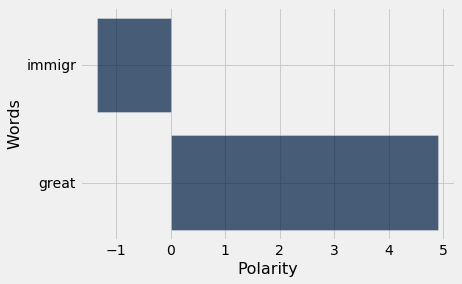

In [85]:
words_polarity.barh("Words")

how he uses words

# Notice immigr vs immigrant what are other words that start with that stem?

In [93]:
immigr_stem = trump.where("no_punc", are.containing("immigr"))
immigr_stem

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2016-02-05 23:13:50,Twitter for iPhone,rt @seanhannity: watch: donald trump owns a heckler who ...,2713,2016.1,2016-02-05 18:13:50-05:00,18.2306,rt seanhannity watch donald trump owns a heckler who ...,-2.6
2016-02-06 02:42:58,Twitter for iPhone,i told you so. our country totally lost control of illeg ...,3117,2016.1,2016-02-05 21:42:58-05:00,21.7161,i told you so our country totally lost control of illeg ...,-6.6
2016-02-06 03:20:34,Twitter for iPhone,"border agent: ""we might as well abolish our immigration ...",2183,2016.1,2016-02-05 22:20:34-05:00,22.3428,border agent we might as well abolish our immigration ...,1.1
2016-02-08 16:33:15,Twitter for iPhone,jeb bush is desperate - strongly in favor of #commoncore ...,2266,2016.1,2016-02-08 11:33:15-05:00,11.5542,jeb bush is desperate strongly in favor of commoncore ...,-3
2016-02-09 12:00:30,Twitter for Android,remember @jebbush wants common core (education from d.c. ...,2084,2016.11,2016-02-09 07:00:30-05:00,7.00833,remember jebbush wants common core education from d c ...,-1.3
2016-02-13 00:31:58,Twitter Web Client,i will end illegal immigration and protect our borders! ...,6233,2016.12,2016-02-12 19:31:58-05:00,19.5328,i will end illegal immigration and protect our borders ...,4
2016-02-20 14:04:56,Twitter for Android,"""@familyredsfans: @foxnews is really starting to campaig ...",1683,2016.14,2016-02-20 09:04:56-05:00,9.08222,familyredsfans foxnews is really starting to campaig ...,-4.9
2016-02-20 17:02:44,Twitter for Android,remember that marco rubio is very weak on illegal immigr ...,3815,2016.14,2016-02-20 12:02:44-05:00,12.0456,remember that marco rubio is very weak on illegal immigr ...,-1.4
2016-02-23 14:37:10,Twitter for Android,ted cruz only talks tough on immigration now because he ...,2787,2016.14,2016-02-23 09:37:10-05:00,9.61944,ted cruz only talks tough on immigration now because he ...,-5.4
2016-02-26 12:30:24,Twitter for Android,"""@waltseher: @realdonaldtrump @morg25016893 @eventbrite ...",2020,2016.15,2016-02-26 07:30:24-05:00,7.50667,waltseher realdonaldtrump morg25016893 eventbrite ...,0


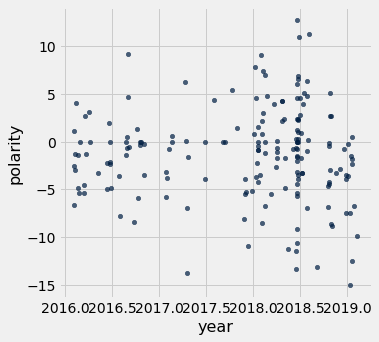

In [96]:
immigr_stem.scatter("year", "polarity")

# Scatterplot / Association
- possible association between retweets and polarity
- len of tweet? (Using apply?)


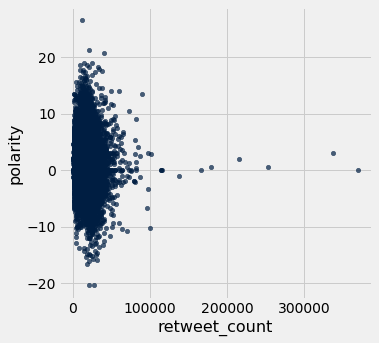

In [97]:
trump.scatter("retweet_count", "polarity")

# Other questions

What are the top 5 most retweeted post?



In [108]:
trump.sort("retweet_count", descending= True).take(np.arange(5))


time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2017-07-02 13:21:42,Twitter for iPhone,#fraudnewscnn #fnn https://t.co/wyunhjjujg,370272,2017.5,2017-07-02 08:21:42-05:00,8.36167,fraudnewscnn fnn https t co wyunhjjujg,0
2016-11-08 11:43:14,Twitter for Android,today we make america great again!,337819,2016.85,2016-11-08 06:43:14-05:00,6.72056,today we make america great again,3.1
2017-11-12 00:48:01,Twitter Web Client,"why would kim jong-un insult me by calling me ""old,"" whe ...",254000,2017.86,2017-11-11 19:48:01-05:00,19.8003,why would kim jong un insult me by calling me old whe ...,0.6
2016-11-09 11:36:58,Twitter for Android,such a beautiful and important evening! the forgotten ma ...,215794,2016.86,2016-11-09 06:36:58-05:00,6.61611,such a beautiful and important evening the forgotten ma ...,1.9
2018-01-03 00:49:19,Twitter for iPhone,north korean leader kim jong un just stated that the “nu ...,180010,2018.01,2018-01-02 19:49:19-05:00,19.8219,north korean leader kim jong un just stated that the nu ...,0.5


What are some patterns in these tweets?
- Kim Jong Un
- fake news
- make america great again

What are the top 5 most negative tweets?

In [104]:
print('Most negative tweets:')
for t in trump.sort('polarity').take(np.arange(5)).column('text'):
    print('\n  ', t)

Most negative tweets:

   the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of an

What are the top 5 most positive tweets?

In [105]:
print('Most positive tweets:')
for t in trump.sort('polarity', descending=True).take(np.arange(5)).column('text'):
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new

### Read the 5 most positive and 5 most negative tweets. Do you think these tweets are accurately represented by their polarity scores?

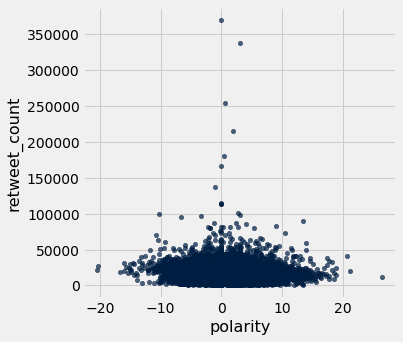

In [22]:
trump.scatter("polarity", "retweet_count")

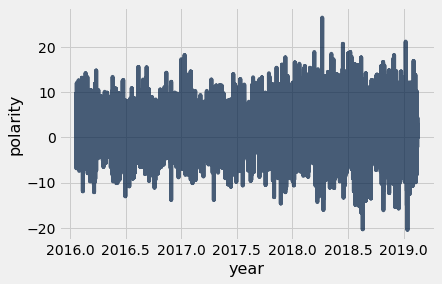

In [60]:
trump.plot("year", "polarity")

In [57]:
trump.where("no_punc", are.containing("racis"))

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2016-06-08 12:10:17,Twitter for Android,"""@joedefranco: top rino hack for msnbc joey scarborough ...",2766,2016.43,2016-06-08 07:10:17-05:00,7.17139,joedefranco top rino hack for msnbc joey scarborough ...,-4.3
2016-06-10 15:36:17,Twitter Web Client,"""donald trump plans to continue gop legacy of leading on ...",4053,2016.44,2016-06-10 10:36:17-05:00,10.6047,donald trump plans to continue gop legacy of leading on ...,-3
2016-06-11 11:18:19,Twitter for Android,mitt romney had his chance to beat a failed president bu ...,10847,2016.44,2016-06-11 06:18:19-05:00,6.30528,mitt romney had his chance to beat a failed president bu ...,-7.9
2016-06-11 12:00:26,Twitter for Android,"don king, and so many other african americans who know m ...",9690,2016.44,2016-06-11 07:00:26-05:00,7.00722,don king and so many other african americans who know m ...,-0.9
2016-06-11 23:28:13,Twitter for Android,"goofy elizabeth warren, sometimes referred to as pocahon ...",12177,2016.44,2016-06-11 18:28:13-05:00,18.4703,goofy elizabeth warren sometimes referred to as pocahon ...,-3
2016-08-26 02:58:51,Twitter for iPhone,"""hillary clinton needs to address the racist undertones ...",16160,2016.65,2016-08-25 21:58:51-05:00,21.9808,hillary clinton needs to address the racist undertones ...,-3
2016-08-29 13:15:39,Twitter for Android,"""@rhondar: thank-you clarence henderson for telling @cnn ...",6660,2016.66,2016-08-29 08:15:39-05:00,8.26083,rhondar thank you clarence henderson for telling cnn ...,-1.6
2018-01-14 03:45:45,Twitter for iPhone,rt @jackposobiec: dick durbin called trump racist for wa ...,21688,2018.04,2018-01-13 22:45:45-05:00,22.7625,rt jackposobiec dick durbin called trump racist for wa ...,-7.6
2018-08-11 13:26:32,Twitter for iPhone,the riots in charlottesville a year ago resulted in sens ...,30954,2018.61,2018-08-11 08:26:32-05:00,8.44222,the riots in charlottesville a year ago resulted in sens ...,-10.5


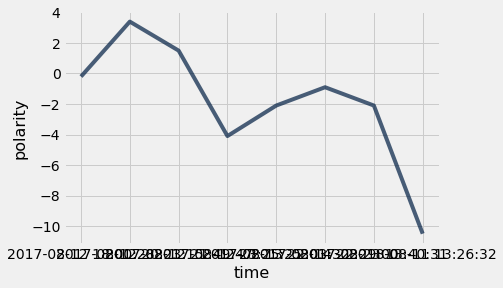

In [86]:
trump.where("no_punc", are.containing("charlottesville")).plot("time", "polarity")

In [29]:
trump.where("year", are.above(2018.1))

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2018-02-07 00:48:01,Twitter for iPhone,happy birthday to our 40th president of the united state ...,30794,2018.1,2018-02-06 19:48:01-05:00,19.8003,happy birthday to our 40th president of the united state ...,4.5
2018-02-07 03:05:45,Twitter for iPhone,congratulations @elonmusk and @spacex on the successful ...,29606,2018.1,2018-02-06 22:05:45-05:00,22.0958,congratulations elonmusk and spacex on the successful ...,8.9
2018-02-07 14:59:49,Twitter for iPhone,"in the “old days,” when good news was reported, the stoc ...",20574,2018.1,2018-02-07 09:59:49-05:00,9.99694,in the old days when good news was reported the stoc ...,7.4
2018-02-07 16:10:00,Twitter for iPhone,new fbi texts are bombshells!,36478,2018.1,2018-02-07 11:10:00-05:00,11.1667,new fbi texts are bombshells,0
2018-02-07 18:01:05,Media Studio,best wishes to the republic of korea on hosting the @oly ...,11982,2018.1,2018-02-07 13:01:05-05:00,13.0181,best wishes to the republic of korea on hosting the oly ...,13.3
2018-02-07 22:13:16,Media Studio,congratulations to the republic of korea on what will be ...,12455,2018.1,2018-02-07 17:13:16-05:00,17.2211,congratulations to the republic of korea on what will be ...,10.1
2018-02-07 22:36:15,Twitter for iPhone,the budget agreement today is so important for our great ...,21705,2018.1,2018-02-07 17:36:15-05:00,17.6042,the budget agreement today is so important for our great ...,10.5
2018-02-08 11:08:39,Twitter for iPhone,will be heading over shortly to make remarks at the nati ...,16713,2018.1,2018-02-08 06:08:39-05:00,6.14417,will be heading over shortly to make remarks at the nati ...,10
2018-02-08 17:13:13,Twitter for iPad,our founders invoked our creator four times in the decla ...,27866,2018.1,2018-02-08 12:13:13-05:00,12.2203,our founders invoked our creator four times in the decla ...,7.8
2018-02-08 18:44:00,Twitter for iPhone,i will be meeting with henry kissinger at 1:45pm. will b ...,12749,2018.1,2018-02-08 13:44:00-05:00,13.7333,i will be meeting with henry kissinger at 1 45pm will b ...,0


rtwt & source


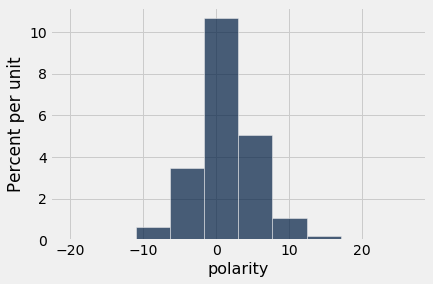

In [47]:
trump.hist("polarity")

In [63]:
trump.where("polarity", are.below_or_equal_to(-15))#.column("text")

time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
2018-04-13 12:01:47,Twitter for iPhone,james comey is a proven leaker & liar. virtually eve ...,31488,2018.28,2018-04-13 07:01:47-05:00,7.02972,james comey is a proven leaker amp liar virtually eve ...,-16
2018-08-09 16:02:33,Twitter for iPhone,this is an illegally brought rigged witch hunt run by pe ...,24932,2018.6,2018-08-09 11:02:33-05:00,11.0425,this is an illegally brought rigged witch hunt run by pe ...,-15.2
2018-08-15 14:08:18,Twitter for iPhone,the rigged russian witch hunt goes on and on as the “ori ...,18123,2018.62,2018-08-15 09:08:18-05:00,9.13833,the rigged russian witch hunt goes on and on as the ori ...,-16.6
2018-08-20 11:48:12,Twitter for iPhone,where’s the collusion? they made up a phony crime called ...,22721,2018.63,2018-08-20 06:48:12-05:00,6.80333,where s the collusion they made up a phony crime called ...,-15
2018-08-20 17:14:59,Twitter for iPhone,it is outrageous that poisonous synthetic heroin fentany ...,26870,2018.63,2018-08-20 12:14:59-05:00,12.2497,it is outrageous that poisonous synthetic heroin fentany ...,-20.3
2018-10-27 21:41:35,Twitter for iPhone,...this evil anti-semitic attack is an assault on humani ...,20506,2018.82,2018-10-27 16:41:35-05:00,16.6931,this evil anti semitic attack is an assault on humani ...,-16.1
2018-12-05 13:51:07,Twitter for iPhone,".....considered to be the worst and most dangerous, addi ...",17262,2018.93,2018-12-05 08:51:07-05:00,8.85194,considered to be the worst and most dangerous addi ...,-15.4
2018-12-16 15:03:22,Twitter for iPhone,"at the request of many, i will be reviewing the case of ...",25760,2018.96,2018-12-16 10:03:22-05:00,10.0561,at the request of many i will be reviewing the case of ...,-15.7
2019-01-12 14:42:21,Twitter for iPhone,23% of federal inmates are illegal immigrants. border ar ...,30481,2019.03,2019-01-12 09:42:21-05:00,9.70583,23 of federal inmates are illegal immigrants border ar ...,-15
2019-01-14 03:12:34,Twitter for iPhone,the trump portrait of an unsustainable border crisis is ...,21601,2019.04,2019-01-13 22:12:34-05:00,22.2094,the trump portrait of an unsustainable border crisis is ...,-20.4


events in time & his reactions> how did people react / interpret his response based on retweets & history

charlottesville
witch hunt
russia
hillary / bernie election
inauguration

In [ ]:
trump.plot("time", "polarity")